In [55]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import pandas as pd

%matplotlib inline

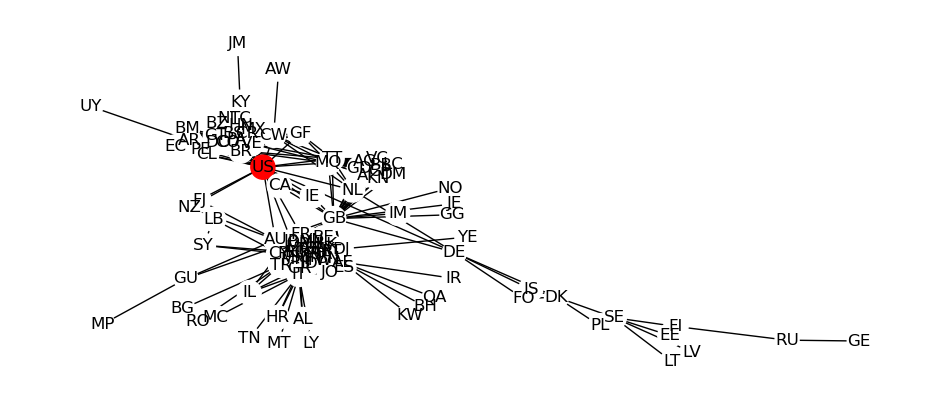

In [35]:
def plot_net (graph):
    color_map = []
    for node in graph:
        if node == 'US':
            color_map.append('red')
        else: 
            color_map.append('white')      
            
    fig, ax = plt.subplots(1, 1, figsize=(12, 5));
    nx.draw(graph, node_color=color_map, with_labels=True)
    plt.show()
    

G = nx.read_gpickle('data/graphs/2001.pickle')
plot_net(G)

# Compute gini coefficient of betweenness centrality

In [46]:
def betweenness (graph):
    bd = nx.betweenness_centrality(graph, weight='weight') # Run betweenness centrality
    nx.set_node_attributes(graph, bd, 'betweenness')
    return bd

bdict = betweenness(G)
bdict

{'NC': 0.006226378198381836,
 'CD': 0.007553893924695355,
 'UY': 0.0,
 'BL': 0.0008485485148582173,
 'IE': 0.011883189328111247,
 'DE': 0.07053530447525201,
 'AR': 8.472157897445253e-05,
 'TG': 0.0007128766335534469,
 'KW': 0.003523825549639267,
 'LB': 0.0010071497773232298,
 'NO': 0.010257953930497356,
 'PK': 0.008312680993861333,
 'GL': 0.0,
 'AO': 0.013192881579663827,
 'IL': 6.201296262148189e-05,
 'SO': 0.0025449078037660107,
 'YE': 0.0032932387459328354,
 'DK': 0.020516927860688657,
 'TZ': 0.0019019805578789476,
 'IQ': 0.0035288015335056292,
 'CN': 0.0037465379313693895,
 'LC': 0.0033567764711580853,
 'PF': 0.021406519116982495,
 'SY': 7.29793833242109e-06,
 'NU': 0.0,
 'SD': 0.005760267581650743,
 'PT': 0.04480582331674765,
 'AU': 0.09828948219779958,
 'AE': 0.00716812541005845,
 'CC': 8.377096832868947e-05,
 'GQ': 0.00021354486937593162,
 'YT': 0.0,
 'GE': 0.0006866758394481925,
 'GM': 0.0003450799504764777,
 'NL': 0.010423464066996277,
 'CO': 0.005816948513235003,
 'NA': 0.000

In [51]:

def gini(array: np.array) -> float:
    """
    Calculate the Gini coefficient of a numpy array.
    from https://github.com/oliviaguest/gini/
    """
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1, array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

gini(np.array(list(bdict.values())))

0.7462245375416602

In [65]:
rows = []
for fn in listdir('data/graphs'):
    year = int(fn.split('.')[0])
    G = nx.read_gpickle(f'data/graphs/{fn}')
    bdict = betweenness(G)
    g = gini(np.array(list(bdict.values())))
    rows.append([year, g])

<AxesSubplot:xlabel='year'>

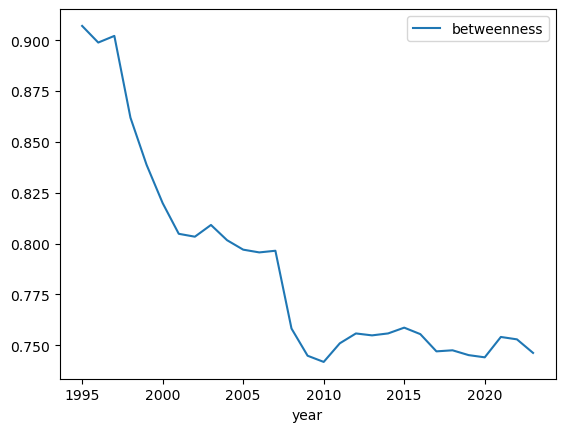

In [66]:
metric = pd.DataFrame(rows, columns=['year', 'betweenness'])
metric = metric.set_index('year')
metric = metric.sort_values(by='year')
metric = metric[metric.index > 1994]
metric.plot()

In [67]:
metric.to_csv('undersea-cables.csv')